In [1]:
import numpy
from etrade.spot.forecast.plan_a.simulator2 import WeightGaussianMarketSimulator
from etrade.spot.trader import Station
from etrade.spot.market.recycle import BasicRecycle, PointwiseRecycle
from etrade.spot.forecast.market import DistributiveSeries, DistributiveMarket
from etrade.spot.forecast.plan_a.constructor import *
from etrade.spot.forecast.yieldindex import zero_quantile
from etrade.spot.forecast import yieldindex
from  data_utils.stochastic_utils.vdistributions.abstract import AbstractDistribution, eps
from  data_utils.stochastic_utils.vdistributions.parameter.continuous.basic import NormalDistribution, SkewNormalDistribution
from data_utils.stochastic_utils.vdistributions.nonparametric.continuous.kernel2 import KernelMixDistribution
from data_utils.stochastic_utils.vdistributions.tools.divergence import kl_divergence_continuous, crps, quantile_RMSE, js_divergence_continuous

from data_utils.stochastic_utils.vdistributions.nonparametric.continuous.mfk.skewnd2 import dof_snd_fitter

from scipy.optimize import differential_evolution

from matplotlib import pyplot
import json

In [2]:
init_kwargs = {
    "aq_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 50), (1, 10), (1, 3)),
    "dp_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 10), (1, 10), (1, 3)),
    "rp_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 10), (1, 10), (1, 3)),
    "aq_range": (0, 50),
    "dp_range": (0, 1e+6),
    "rp_range": (0, 1e+6),
    # "real_market": 1000,
    # "noise_weight": 0,
    "market_len": 1,
    # "kernel_num": None
    "noise_weight": numpy.full((3,4), 0.0)
}
s = Station("station", 50)
br = PointwiseRecycle(0.5, 1.05)

In [3]:
ms = WeightGaussianMarketSimulator(**init_kwargs)

In [4]:
ms.noise_weight

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

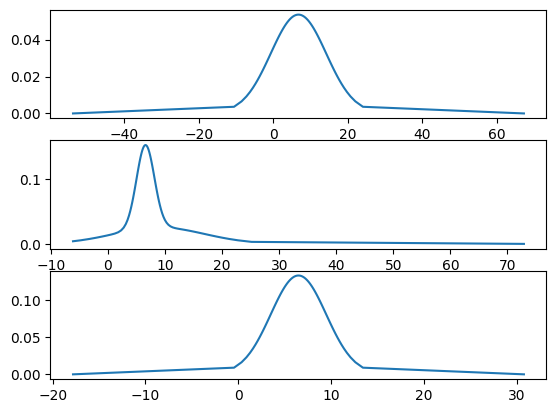

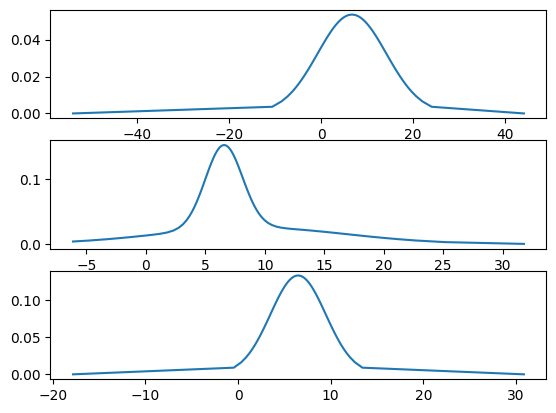

In [5]:
ms.real_market.plot()
ms.predicted_market.plot()

In [6]:
print(ms.real_market.curve_matrix().tolist())

[-2.829011998977186, 0.14693156859296297, 2.325844643307798, 4.178641294485768, 5.884715535195302, 7.547709693622834, 9.253783934332366, 11.106580585510336, 13.285493660225171, 16.26143722779532, 2.261853965103206, 4.49584205290827, 5.4080246383279675, 6.071935436373434, 6.664801299349783, 7.268674251467273, 7.975595619149028, 9.023183112987843, 11.463390830141533, 15.631410194093109, 2.650437706002191, 3.844650440450654, 4.719023788600299, 5.462530278203127, 6.147158712146639, 6.814499592850603, 7.499128026794114, 8.242634516396942, 9.117007864546588, 10.31122059899505]


In [11]:
print(ms.historical_observe(s, br, 1000, 1).tolist())

[19.820804882644726, 5.137832527874543, 5.375712700583159, 0.9351556713098801, 0.9272247794380505, 2.292258562388517, 14.580615028859153, 15.719241223068995, 16.552912214703408, 17.261870874223085, 17.914707537299506, 18.550962410790884, 19.20381452385751, 19.912752825218497, 20.74638900808775, 21.885136677442198, -3.595384231054544, -0.47624062498092834, 2.117723969102823, 3.850950551222639, 4.760330408464106, 5.41193265270587, 5.981290178814877, 6.5495420249235305, 7.201198960521033, 8.162414146570498, -8.559469756265154, -5.18825523887815, -2.719720862183404, -0.6206248559639499, 1.3121402885045332, 3.196134905480624, 5.128960361190636, 7.227966857819738, 9.696395992319152, 13.067999427858698, 18.475010569223823, 0.32013778370684065]


In [8]:
ms.observe()

array([[36.45502576],
       [13.95988925],
       [ 0.15836815]])

In [9]:
ms.observed_crps()

array([[2.1254849 ],
       [1.53107415],
       [0.76874736]])